In [9]:
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

In [10]:
spotify = pd.read_csv('data.csv')

spotify.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


Voor deze opdracht hou ik het bij de laatste 10 jaar omdat het anders te chaotisch eruit gaat zien

In [11]:
lastDecade = spotify[spotify["year"] > 2009]

In [12]:
contk = lastDecade.groupby(['year', 'key']).size().unstack('year', fill_value=0)

contk

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
key,,,,,,,,,,,,
0,222,201,210,272,256,267,271,247,270,249,518,196
1,223,161,211,292,255,220,243,254,310,248,469,193
2,190,200,202,279,227,250,193,200,239,230,374,169
3,42,54,76,64,63,58,57,60,82,60,93,67
4,164,155,142,196,162,207,199,144,202,172,324,144
5,145,144,136,181,182,181,175,150,201,194,349,161
6,130,129,148,208,162,165,156,164,205,169,344,131
7,218,237,230,351,208,273,287,230,331,269,468,210
8,115,96,135,141,134,115,151,150,181,142,298,142


uitleg ove key: key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)

<AxesSubplot:xlabel='key'>

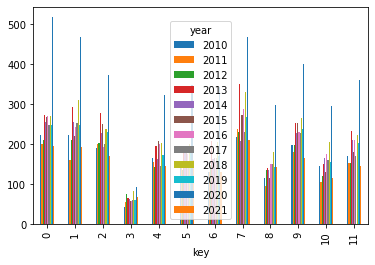

In [13]:
contk.plot(kind='bar')

In [14]:
chi2_contingency(contk)

(196.20293331111307,
 1.8171746171060188e-05,
 121,
 array([[218.05656022, 201.59946133, 217.83416699, 291.55752212,
         250.41477491, 255.75221239, 261.20084648, 239.73989996,
         301.78761062, 258.9769142 , 477.47826087, 204.60176991],
        [211.19727867, 195.25786142, 210.98188114, 282.38616251,
         242.53761936, 247.7071601 , 252.98439959, 232.1985379 ,
         292.29444891, 250.83042429, 462.45849802, 198.16572808],
        [188.83602085, 174.58424569, 188.64342929, 252.48753017,
         216.85809227, 221.48028962, 226.19878275, 207.61369758,
         261.34674175, 224.27286719, 413.49407115, 177.1842317 ],
        [ 53.22802476,  49.21081535,  53.17373815,  71.1697506 ,
          61.12672706,  62.42960579,  63.75962783,  58.5209696 ,
          73.66693484,  63.21676169, 116.55335968,  49.94368463],
        [151.65871489, 140.21277414, 151.50404002, 202.77876106,
         174.1639092 , 177.87610619, 181.66564063, 166.7395152 ,
         209.89380531, 180.1188918

We kunnen hier wel zeggen dat er totaal geen correlatie is tussen key en year

In [19]:
contp = lastDecade.groupby(['year', 'popularity']).size().unstack('year', fill_value=0)

contp

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
popularity,,,,,,,,,,,,
0,734,508,530,1103,762,672,627,696,1071,633,1464,1200
1,64,115,108,71,55,33,93,79,118,68,102,127
2,41,63,59,49,31,58,78,38,87,46,49,73
3,28,31,45,65,70,99,72,14,37,45,44,46
4,16,14,34,61,48,115,72,14,19,40,42,49
...,...,...,...,...,...,...,...,...,...,...,...,...
93,0,0,0,0,0,0,0,0,0,0,2,0
94,0,0,0,0,0,0,0,0,0,0,5,0
95,0,0,0,0,0,0,0,0,0,0,2,0


<AxesSubplot:xlabel='popularity'>

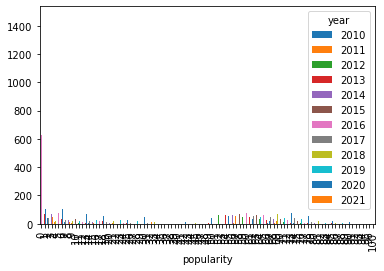

In [21]:
contp.plot(kind='bar')

In [22]:
chi2_contingency(contp)

(13214.459521702454,
 0.0,
 1067,
 array([[6.85928154e+02, 6.34159992e+02, 6.85228584e+02, ...,
         8.14648991e+02, 1.50197628e+03, 6.43604183e+02],
        [7.08563783e+01, 6.55087271e+01, 7.07841128e+01, ...,
         8.41532408e+01, 1.55154150e+02, 6.64843121e+01],
        [4.60943720e+01, 4.26155514e+01, 4.60473609e+01, ...,
         5.47444122e+01, 1.00932806e+02, 4.32502011e+01],
        ...,
        [1.37185631e-01, 1.26831998e-01, 1.37045717e-01, ...,
         1.62929798e-01, 3.00395257e-01, 1.28720837e-01],
        [1.37185631e-01, 1.26831998e-01, 1.37045717e-01, ...,
         1.62929798e-01, 3.00395257e-01, 1.28720837e-01],
        [6.85928154e-02, 6.34159992e-02, 6.85228584e-02, ...,
         8.14648991e-02, 1.50197628e-01, 6.43604183e-02]]))

We kunnen hier stellen dat er geen correlatie is tussen popularity en year